Sample Data:
  ShipmentID      Origin Destination  Distance_km ShipmentDate   DriverID  \
0      SHP_1      Multan      Multan         1103   2024-06-03  Driver_16   
1      SHP_2  Faisalabad      Lahore          455   2024-06-14   Driver_6   
2      SHP_3   Islamabad  Faisalabad         1107   2024-01-07  Driver_14   
3      SHP_4  Faisalabad   Islamabad         1447   2024-05-12  Driver_18   
4      SHP_5  Faisalabad   Islamabad         1256   2024-02-14  Driver_12   

    TruckID ShipmentStatus  
0   Truck_8      Completed  
1   Truck_3      Completed  
2   Truck_5        Delayed  
3  Truck_10      Completed  
4   Truck_4      Completed  
Average Shipment Distance: 830.33 km
Most Frequent Routes:
Route
Faisalabad to Faisalabad    31
Multan to Karachi           29
Lahore to Karachi           26
Multan to Lahore            26
Islamabad to Islamabad      24
Name: count, dtype: int64


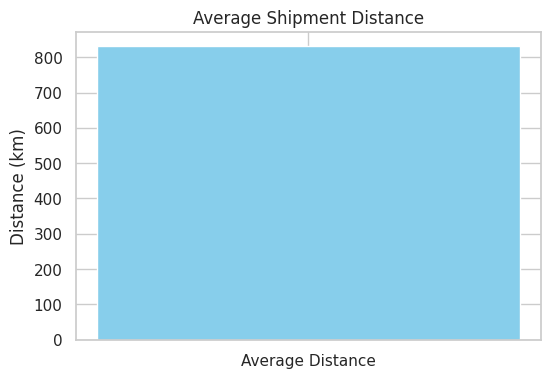

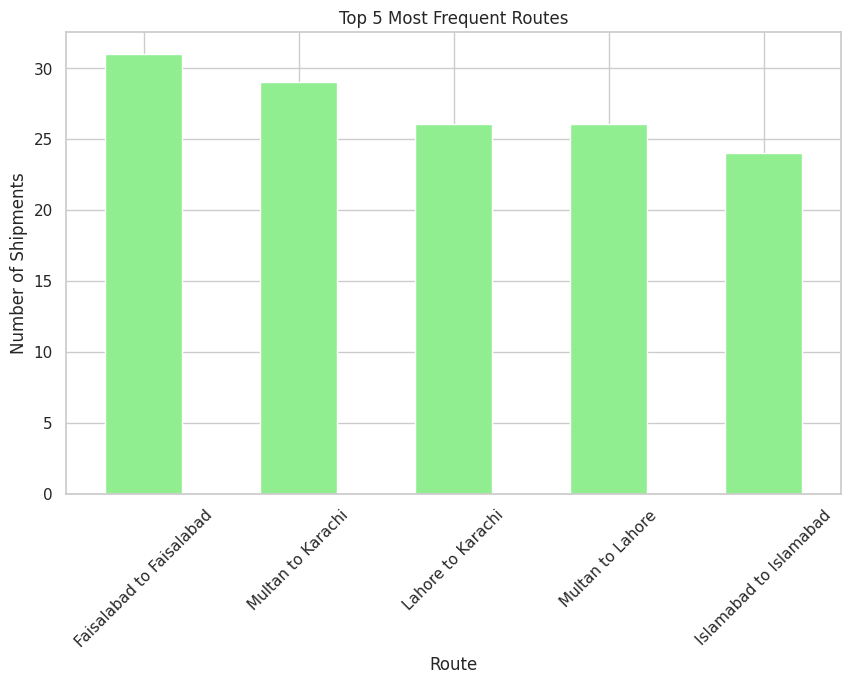

/tmp/ipython-input-1-2659561046.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DriverID', y='Shipments', data=active_shipments.sort_values('Shipments', ascending=False), palette='viridis')


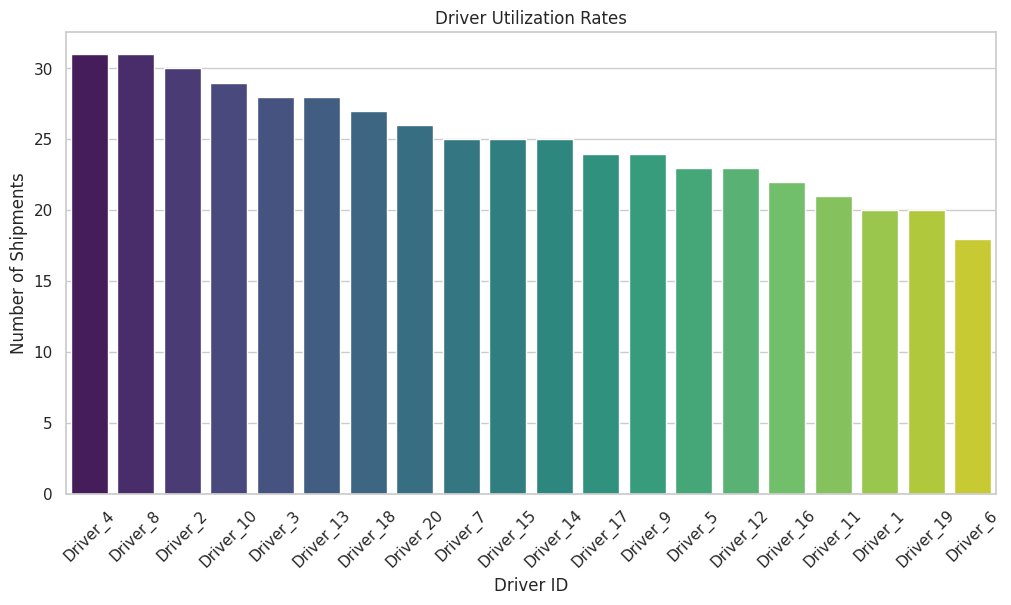

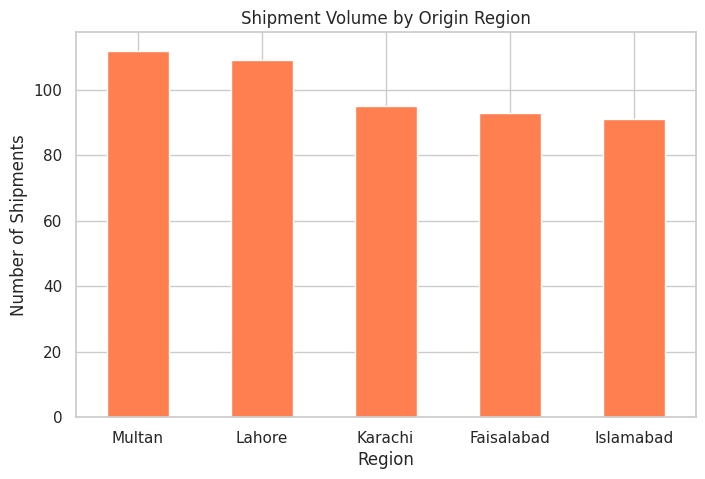

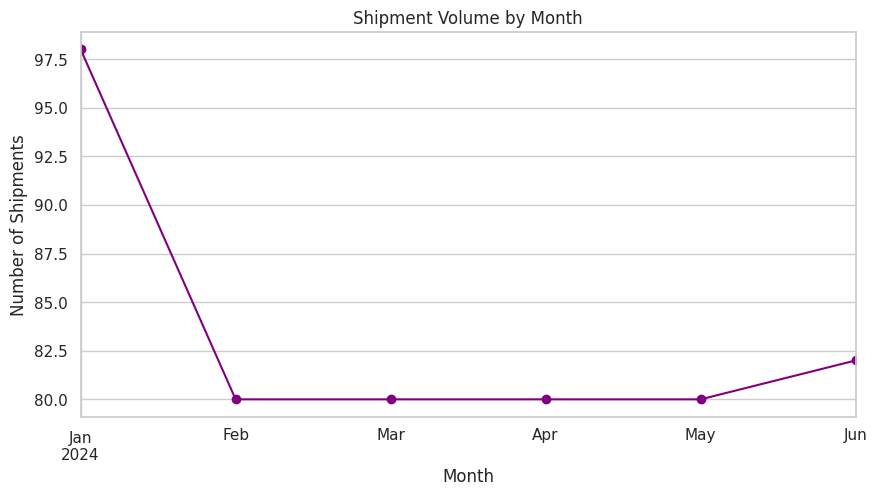

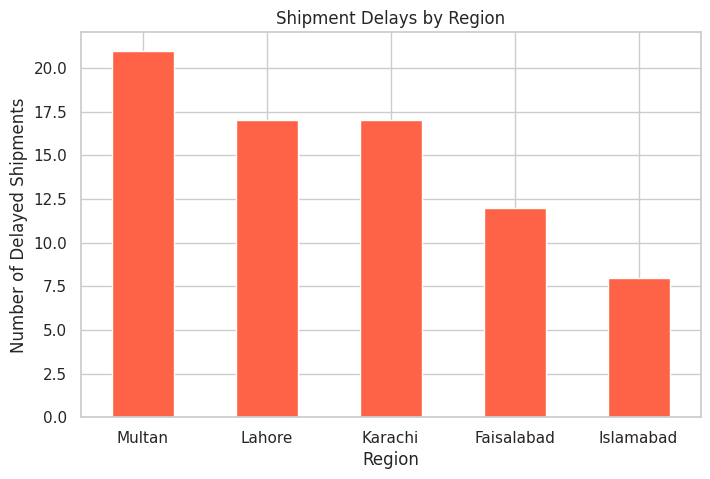


Summary of Findings:
1. The average shipment distance is 830.33 km, which helps estimate fuel and time requirements.
2. The top routes are mostly between Faisalabad to Faisalabad and Multan to Karachi, showing high traffic corridors.
3. Driver utilization is varied, indicating some drivers may be underused while others are highly active.
4. Lahore is the most active shipping origin, suggesting it is a key logistics hub.
5. Peak shipping periods occur in specific months, useful for resource planning.
6. Delays are most frequent in shipments originating from Karachi, which may require further investigation.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


# 1. Creating a Sample Dataset
np.random.seed(42)

# Parameters
num_shipments = 500
origins = ['Lahore', 'Karachi', 'Islamabad', 'Multan', 'Faisalabad']
destinations = ['Lahore', 'Karachi', 'Islamabad', 'Multan', 'Faisalabad']
drivers = [f'Driver_{i}' for i in range(1, 21)]
trucks = [f'Truck_{i}' for i in range(1, 16)]

# Generate shipment data
shipment_data = {
    'ShipmentID': [f'SHP_{i}' for i in range(1, num_shipments + 1)],
    'Origin': np.random.choice(origins, num_shipments),
    'Destination': np.random.choice(destinations, num_shipments),
    'Distance_km': np.random.randint(100, 1500, num_shipments),
    'ShipmentDate': [datetime(2024, 1, 1) + timedelta(days=np.random.randint(0, 180)) for _ in range(num_shipments)],
    'DriverID': np.random.choice(drivers, num_shipments),
    'TruckID': np.random.choice(trucks, num_shipments),
    'ShipmentStatus': np.random.choice(['Completed', 'Delayed'], num_shipments, p=[0.85, 0.15])
}

# Create DataFrame
df = pd.DataFrame(shipment_data)

# 2. Data Cleaning & Preparation
print("Sample Data:")
print(df.head())

# 3. Data Analysis & Insights

# Average Shipment Distance
avg_distance = df['Distance_km'].mean()
print(f'Average Shipment Distance: {avg_distance:.2f} km')

# Most Frequent Routes
df['Route'] = df['Origin'] + ' to ' + df['Destination']
most_common_routes = df['Route'].value_counts().head(5)
print("Most Frequent Routes:")
print(most_common_routes)

# Driver Utilization Rates
active_shipments = df.groupby('DriverID').size().reset_index(name='Shipments')

# Shipment Volume by Region (Origin based)
shipment_by_origin = df['Origin'].value_counts()

# Peak Shipping Periods
shipment_by_month = df['ShipmentDate'].dt.to_period('M').value_counts().sort_index()

# Delays by Region
delays_by_origin = df[df['ShipmentStatus'] == 'Delayed']['Origin'].value_counts()

# -----------------------------
# 4. Visualizations
# -----------------------------

sns.set(style='whitegrid')

# Average Distance Display
plt.figure(figsize=(6, 4))
plt.title('Average Shipment Distance')
plt.bar(['Average Distance'], [avg_distance], color='skyblue')
plt.ylabel('Distance (km)')
plt.show()

# Most Frequent Routes
plt.figure(figsize=(10, 6))
most_common_routes.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Most Frequent Routes')
plt.xlabel('Route')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45)
plt.show()

# Driver Utilization
plt.figure(figsize=(12, 6))
sns.barplot(x='DriverID', y='Shipments', data=active_shipments.sort_values('Shipments', ascending=False), palette='viridis')
plt.title('Driver Utilization Rates')
plt.xlabel('Driver ID')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45)
plt.show()

# Shipment Volume by Region
plt.figure(figsize=(8, 5))
shipment_by_origin.plot(kind='bar', color='coral')
plt.title('Shipment Volume by Origin Region')
plt.xlabel('Region')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=0)
plt.show()

# Peak Shipping Periods
plt.figure(figsize=(10, 5))
shipment_by_month.plot(kind='line', marker='o', color='purple')
plt.title('Shipment Volume by Month')
plt.xlabel('Month')
plt.ylabel('Number of Shipments')
plt.grid(True)
plt.show()

# Delays by Region
plt.figure(figsize=(8, 5))
delays_by_origin.plot(kind='bar', color='tomato')
plt.title('Shipment Delays by Region')
plt.xlabel('Region')
plt.ylabel('Number of Delayed Shipments')
plt.xticks(rotation=0)
plt.show()

# 5. Sample Commentary for Dashboard
print("\nSummary of Findings:")
print(f"1. The average shipment distance is {avg_distance:.2f} km, which helps estimate fuel and time requirements.")
print(f"2. The top routes are mostly between {most_common_routes.index[0]} and {most_common_routes.index[1]}, showing high traffic corridors.")
print("3. Driver utilization is varied, indicating some drivers may be underused while others are highly active.")
print("4. Lahore is the most active shipping origin, suggesting it is a key logistics hub.")
print("5. Peak shipping periods occur in specific months, useful for resource planning.")
print("6. Delays are most frequent in shipments originating from Karachi, which may require further investigation.")
